<a href="https://colab.research.google.com/github/otavioaugusto1/Deep-Learning-with-PyTorch/blob/main/Treinando_uma_rede_neural_deep_learning_com_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Função de perda: é preciso definir uma medida numérica de qualidade.

Exemplo: minimizar a distância da entre a mão do Patrick e a tampa- vídeo disponibilizado no curso, onde avisavam ao Patrick para por a mão na tampa, porém após várias tentativas ele consegue achar.

**Função de perda, função objetivo, critério, loss** tudo tem haver com a mesma coisa.

Todo o critério de avaliação é compactado a um único escalar.

**Regressão**: modelo capaz de inferir a variável dependente (valor) a partir da variável independente (número de cômodos), exemplo sobre o preço dos imóveis em Boston.

Exemplo de qualidade desse modelo: distância pelo valor real ao valor inferido.

Função de perda:
  
    • Perda L1: | y´ - y| (distância euclidiana)
  
    • | y´ - y|² MSE (erro médio quadrático)
  Para regressão, isso são funções de perdas.

**Classificação**
    • a quantidade de neurônios de saída é relacionada a quantidade de classes que o problema tem.

Função de perda para classificação:

    • Cross-entropy (entropia cruzada) / log loss

In [ ]:
import torch
from torch import nn

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
print(device)

cuda


Vamos trabalhar com o dataset de classificação de vinhos.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
data = wine.data
target = wine.target
print(data.shape,target.shape)
print(wine.feature_names,wine.target_names)

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


Vamos instanciar um MLP com uma camada escondida e uma camada de saída.



In [ ]:

class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU

In [ ]:
print(net)


WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


**Classificação**

O primeiro passo é instanciar a função de perda de sua escolha. Trata-se de um problema de classificação com 3 classes, nesse caso a Cross Entropy é a função recomendada, que no PyTorch recebe o nome de CrossEntropyLoss: https://pytorch.org/docs/stable/nn.html#crossentropyloss

Assim como a rede, as entradas e os rótulos, a função de perda também deve ser carregada na **GPU**

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) # cast na GPU


Antes de aplicar a função de perda, vamos fazer o cast dos dados para tensores e extrair as predições y' da rede.



In [ ]:
Xtns = torch.from_numpy(data).float()
Ytns = torch.from_numpy(target)

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)


torch.float32 torch.int64


In [ ]:
pred = net(Xtns)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Confira as dimensões de y e y'. Enquanto as predições estão em termos de probabilidades, os rótulos de classificação devem são valores inteiros referentes aos índices das classes.



In [ ]:
print(pred.shape, Ytns.shape)

print(pred[0].data, Ytns[0].data)


torch.Size([178, 3]) torch.Size([178])
tensor([1., 0., 0.], device='cuda:0') tensor(0, device='cuda:0')


As funções de perda implementadas no PyTorch esperam o seguinte padrão de chamada:

loss = criterion(prediction, target)
Vale lembrar que cada função de perda possui especificidades quanto às dimensões dos seus parâmetros. Para a Cross Entropy:

• prediction: (N, C)
• target: (N,)


In [ ]:
loss = criterion(pred, Ytns)
print(loss)


tensor(1.2200, device='cuda:0', grad_fn=<NllLossBackward>)


**Regressão**

Vamos trabalhar com o dataset de Diabetes, cujo objetivo é prever a progressão da diabetes em um paciente.

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
print(target[14])


(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25563519e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19914449e-02 -7.56356220e-02]
118.0


**Implementando o MLP**

In [ ]:
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = 1  # Progressão da diabetes

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU

Para solucionar problemas de regressão, as funções de perda correspondentes esperam que ambos o rótulo e a predição tenham a mesma dimensionalidade. Não se trata mais de um problema categórico.

Portanto, vamos simular um problema de regressão e aplicar a MSELoss

Documentação: https://pytorch.org/docs/stable/nn.html#mseloss

In [ ]:
criterion = nn.MSELoss().to(device)

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)

torch.Size([442, 10]) torch.Size([442])


In [ ]:

pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(28771.2168, device='cuda:0')


In [ ]:
criterion = nn.L1Loss().to(device)

pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(151.1335, device='cuda:0')


**Documentação**

Veja a documentação para consultar a lista de todas as funções de perda implementadas no PyTorch:

https://pytorch.org/docs/stable/nn.html#loss-functions

# **Otimização**

Para entender o processo de otimização, vamos utilizar um dataset de classificação de vinhos. A classificação é feita com base em análises químicas realizadas em três diferentes cultivos na mesma região da Itália.

O carregamento dos dados está descrito na documentação do Scikit-Learn:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Dentre os 13 atributos do dataset, selecionamos 2 para facilitar a visualização dos resultados:

    •Teor Alcoólico: índice 0
    •Intensidade da cor: índice 9

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0, 0.5, 'color_intensity')

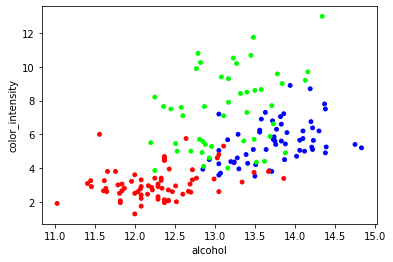

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

print(wine.feature_names)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

**Padronização**

Um pré-processamento extremamente importante nesse caso é a padronização dos valores de entrada. Como as características variam em intervalos diferentes (cor: [1, 13], álcool: [11, 15]), elas vão exercer diferentes influências sobre o nosso modelo e prejudicar muito a sua convergência.

    •Ao final dessa aula, sugiro que rode esse script comentando a célula abaixo, e veja o impacto sobre o processo de otimização.

Text(0, 0.5, 'color_intensity')

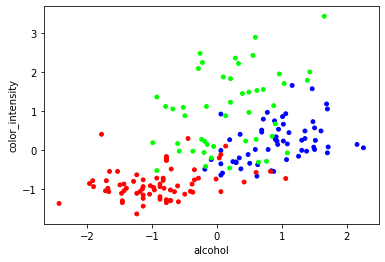

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

**Instanciando sua rede**

Antes de entrar nas nuances da otimização, vamos fazer o que já sabemos: instanciar um MLP de duas camadas neurais, uma escondida e outra de saída.

Lembre-se de definir o dispositivo de hardware (cuda ou cpu) antes de iniciar os trabalhos.

In [ ]:
import torch
from torch import nn

torch.manual_seed(42)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names) # numero de classes 

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

net = net.to(device)


cuda


**Visualizando a fronteira de decisão**

Para facilitar o entendimento do processo de otimização, vamos utilizar uma função auxiliar para visualizar a fronteira de decisão da nossa rede neural de classificação. 

Como acabamos de instanciá-la, seus pesos modelam uma função aleatória que não se ajusta adequadamente aos dados, e isso é facilmente visível em duas dimensões.

Adaptada de:

https://github.com/camilalaranjeira/Neural-Lectures/blob/master/XOR_Problem.ipynb

In [ ]:
import numpy as np 

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


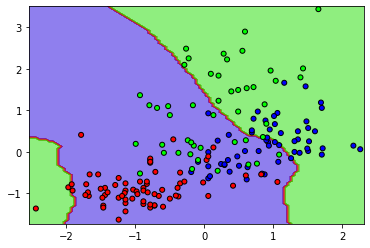

In [ ]:
plot_boundary(data, targets, net)


**Pacote torch.optim**

Mãos a obra! Vamos agora otimizar a nossa rede usando os algoritmos mais tradicionais da área. Para isso, a biblioteca torch.optim nos será bem útil, pois ela implementa os principais algoritmos de otimização de redes neurais.

O primeiro passo é instanciar o otimizador. De acordo com o pacote optim, basta chamar o otimizador escolhido, passando como parâmetro:

    •Os parâmetros da rede que será otimizada (net.parameters())
    •A taxa de aprendizado

A depender do otimizador, pode ser necessário alimentar outros parâmetros, mas esses dois são obrigatórios!

Vamos utilizar a Descida do Gradiente que vimos na aula teórica, implementada pelo otimizador optim.SGD (Stochastic Gradient Descent).

In [ ]:
from torch import optim

# Função de Perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente
# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)

**Hiperparâmetros**

    •Valores definidos antes do início do aprendizado

    •Devem ser ajustados para cada tarefa específica

A taxa de aprendizado não é o primeiro hiperparâmetro que temos contato. Ao definir a arquitetura da sua rede (quantos neurônios e quantas camadas) você também teve que escolher um valor adequado. Essa escolha pode ser empírica, mas em geral deve ser experimental, na busca pelo melhor conjunto de hiperparâmetros para solucionar o seu problema!

    •🐼 Empírica (Abordagem do Panda): O programador investe seus esforços em um único modelo (um bebê panda), e altera os hiperparâmetros com base na sua experiência e nas observações
    
    •💻 Experimental: Múltiplos modelos são gerados simultaneamente, com diferentes combinações de hiperparâmetros. Dentre eles, é escolhido o que apresentar melhor performance.

**Cast do dados**

Os dados carregados do Scikit-Learn são retornados como ndarrays, por isso precisamos convertê-los para tensores e carregá-los na GPU (caso disponível) antes de alimentar o modelo neural.

In [ ]:

X = torch.FloatTensor(data).to(device) # GPU
Y = torch.LongTensor(targets).to(device)

**Treinando um modelo**

O treinamento consiste nas etapas que vimos na aula teórica. Aqui vamos relacionar cada etapa ao seu código correspondente.

  •Forward
    •Alimentar os dados para a rede
    pred = net(X)
    •Calcular a função de custo
    loss = criterion(pred, y)
  •Backpropagation
    •Calcular o gradiente
    loss.backward()
    •Atualizar os pesos
    optimizer.step()

A princípio não vamos falar de procedimentos adequados de treinamento. Vamos apenas realizar as etapas de treinamento e ver o que acontece.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


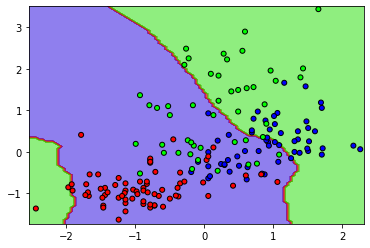

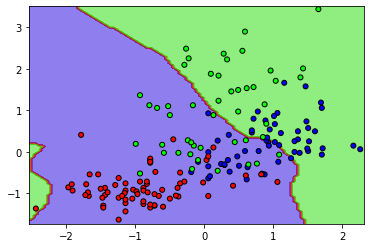

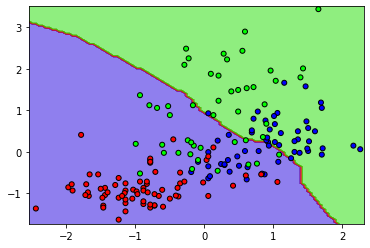

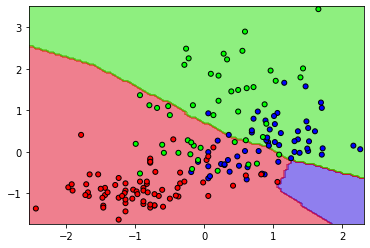

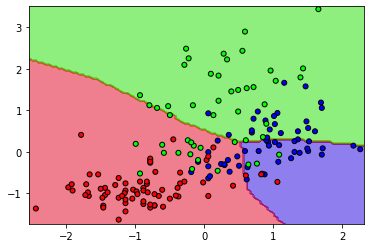

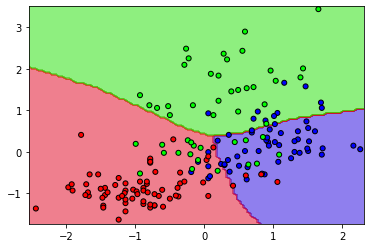

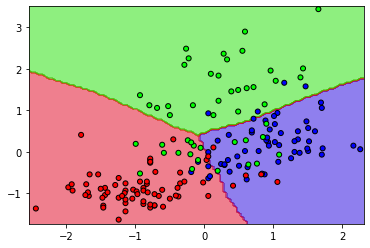

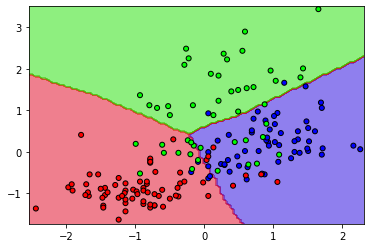

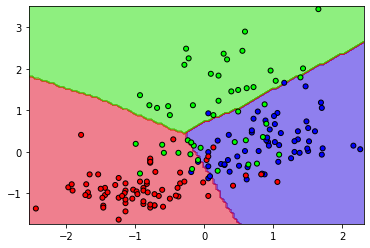

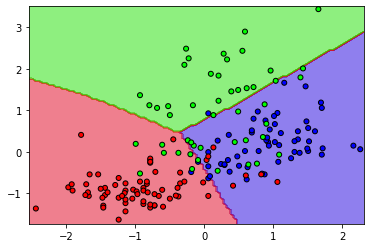

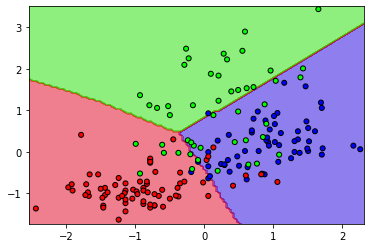

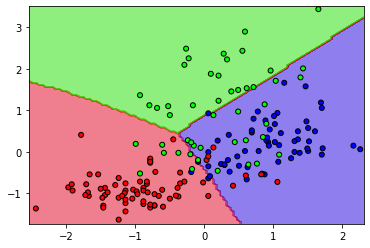

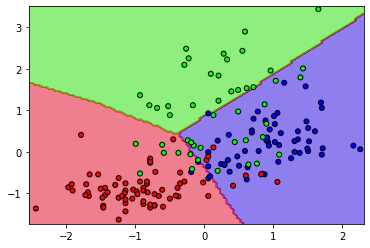

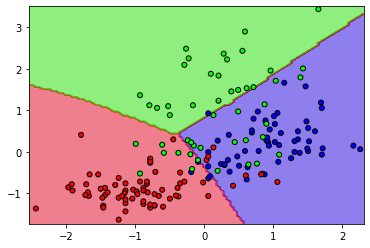

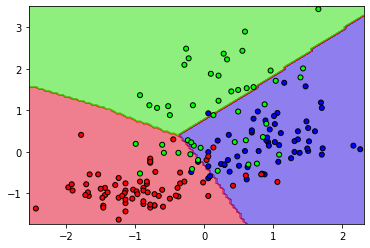

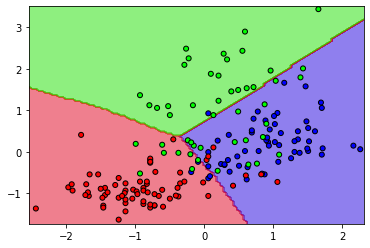

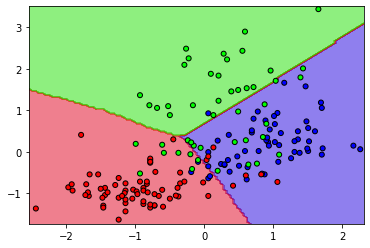

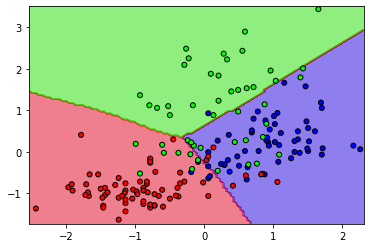

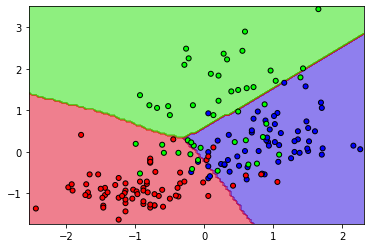

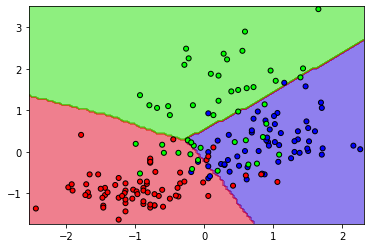

In [ ]:
for i in range(200):
  # Forward 
  pred = net(X)
  loss = criterion(pred, Y)

  # Backward
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, targets, net)

**Treinamento: Conclusão**

Como a otimização de uma rede neural é um processo iterativo, os dados de treino devem ser alimentados múltiplas vezes para o modelo. Cada iteração onde o conjunto de treino inteiro foi utilizado no processo de treinamento é chamado de . Veremos essas nomenclaturas em detalhes nas aulas futuras.

**Carregamento de Dados**

Objetivos dessa aula:

  •Carregar dados reais do Pytorch
  
  •Implementar o fluxo de treinamento completo de uma rede

Mas calma que essa ainda não é a linha de chegada. Ainda precisaremos falar do fluxo de validação.

**Hiperparâmetros**

Agora que a brincadeira está ficando séria, que tal uma sugestão de como organizar o seu código? Para facilitar o entendimento e manutenção do código, mantenha sempre no início os seguintes elementos:

  •imports de pacotes
  
  •configuração de hiperparâmetros
  
  •definição do hardware padrão utilizado

Nessa aula vamos trabalhar com dados reais, então vamos precisar de GPU! Então não se esqueça de mudar as configurações desse ambiente do colab.
Sugiro rodar esse mesmo código sem GPU em outro momento, só pra sentir o gostinho de como a GPU facilitou o uso de redes neurais.

In [ ]:
import torch
from torch import nn, optim

from torchvision import datasets
from torchvision import transforms 

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time

args = {
    'batch_size': 5,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args['device'])

cuda


**Datasets**
O PyTorch possui dois pacotes que trazem datasets prontos para uso.

  •Torchtext: https://torchtext.readthedocs.io/en/latest/datasets.html

  •Torchvision: https://pytorch.org/docs/stable/torchvision/datasets.html

Como os nomes indicam, são datasets de textos (text) e imagens (vision), duas aplicações onde redes neurais são muito bem sucedidas.

Para aplicações com textos e outros tipos de séries temporais, o carregamento de dados possui nuances que dificultam o entendimento, portanto vamos concentrar no carregamento de imagens.

**Torchvision datasets**

Para trabalhar com datasets do pacote torchvision, basta

  •Importar o pacote
    from torchvision import datasets
  
  •Carregar o dataset do seu interesse (ex: MNIST)
    data = datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)

Documentação: https://pytorch.org/docs/stable/torchvision/datasets.html

**Torchvision transforms**

Não vamos entrar em detalhes sobre transformações de imagens, mas para qualquer dataset é necessário transformá-lo em tensor para que possamos alimentar uma rede em pytorch. Isso pode ser feito no carregamento dos dados, basta:

  •Importar o pacote transforms
    from torchvision import transforms

  •preencher o parâmetro tranform do dataset com a função que converte para tensor.
    transforms.ToTensor()

Pronto! Quando seu dado for carregado, ele passará pela transformação indicada no parâmetro tranform, nesse caso, convertendo o dado para um tensor.

Documentação: https://pytorch.org/docs/stable/torchvision/transforms.html

In [ ]:
train_set = datasets.MNIST('./', 
                           train=True, 
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste:' + str(len(test_set)))


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!
Amostras de treino: 60000
Amostras de Teste:10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Cada dataset possui uma implementação específica internamente no pytorch. Verifique o type da variável que recebeu os dados e veja que se refere a uma classe específica do dataset.

No entanto, o item de qualquer dataset sempre será uma tupla (dado, rótulo).

In [ ]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


Podemos então iterar no dataset para observar algumas amostras e seus rótulos.

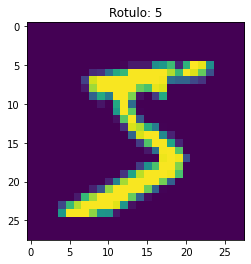

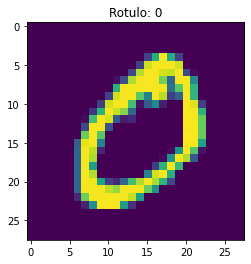

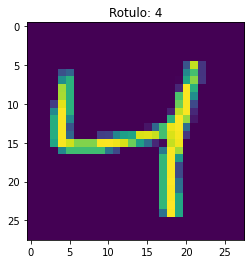

In [ ]:
for i in range(3):
  dado, rotulo = train_set[i]

  plt.figure()
  plt.imshow(dado[0])
  plt.title('Rotulo: '+ str(rotulo))

Temos um total de 70 mil amostras, mas elas ainda não estão carregadas na memória (isso seria bastante custoso). A vantagem da classe Dataset do Pytorch é que as amostras só são carregadas quando necessário.

Sugestão: experimente trocar a transformação do Dataset para

    transforms.RandomCrop(12)

Essa função realiza um recorte aleatório de 12 x 12 (pixels) na imagem. Ao carregar a mesma amostra múltiplas vezes, um novo recorte será feito.

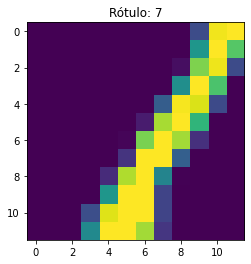

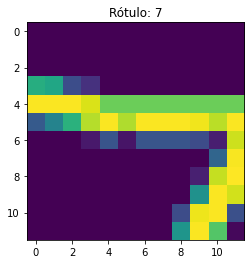

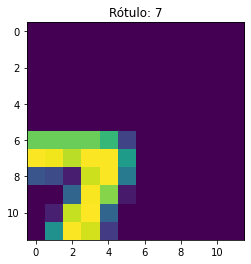

In [ ]:
crop_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.RandomCrop(12),
                           download=False)

# Tuple (dado, rótulo)
for i in range(3):
  dado, rotulo = crop_set[0]
  
  plt.figure()
  plt.imshow(dado)
  plt.title('Rótulo: '+ str(rotulo))

Em resumo, cada vez que indexamos um item do dataset, as seguintes operações são realizadas:

  
  •Amostra lida do arquivo e carregada como uma tupla (dado, rótulo)
  
  •As transformações são aplicadas

**Dataloader**

Essa aqui é uma das principais razões do Pytorch ser o pacote preferido de muitos profissionais. O Dataloader gerencia muito bem o carregamento de dados para o treinamento de redes neurais, trazendo as funções:

  •Separação dos dados em batches

  •Embaralhando os dados

  •Carregando batches em paralelo utilizando threads

O uso de threads no carregamento minimiza períodos ociosos de processamento, visto que a leitura de dados em arquivo é um grande gargalo de tempo.

As três funcionalidades que acabamos de conhecer são controladas pelos parâmetros da chamada do DataLoader.

loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

In [ ]:
train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


O objeto retornado é um iterador, podendo ser utilizado para iterar em loops mas não suportando indexação.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([5, 1, 28, 28]) torch.Size([5])


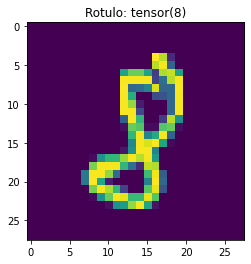

In [ ]:
for batch in train_loader:
  
  dado, rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: '+ str(rotulo[0]) )
  break

**Implementando o MLP**

**Lembrete**: Multi-Layer Perceptrons trabalham somente com dados unidimensionais (vetores). Sendo a imagem com dimensionalidade (1, 28, 28), precisamos linearizá-la antes de alimentar a rede. Isso implica que o a entrada da rede terá input_size = 28 x 28 x 1 = 784

In [ ]:
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.softmax(self.out(feature))

    return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU

**Definindo loss e otimizador**

In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

**Fluxo de Treinamento**

Agora vamos aplicar o conhecimento que acabamos de aprender!

Relembrando o passo a passo do fluxo de treinamento:

  •Iterar nas épocas

  •Iterar nos batches

  •Cast dos dados no dispositivo de hardware

  •Forward na rede e cálculo da loss

  •Cálculo do gradiente e atualização dos pesos

Para acompanhar a convergência do seu modelo (e garantir que tudo foi feito certinho), ao final de cada época podemos imprimir a média e o desvio padrão das perdas de cada iteração.

In [ ]:
for epoch in range(args['num_epochs']):
  start = time.time()

  epoch_loss = []
  for batch in train_loader:
    
    dado, rotulo = batch

    # Cast na GPU
    dado   = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    # Forward 
    pred = net(dado)
    loss = criterion(pred, rotulo)
    epoch_loss.append(loss.cpu().data)

    # Backward
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)
  end = time.time()

  print("Epoca %d, Loss: %.4f +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start) )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


KeyboardInterrupt: ignored

**Interpretando a qualidade do modelo**

Apesar da loss ser o critério utilizado na otimização do modelo, seu valor é pouco interpretável por seres humanos.

  •A loss está melhorando, mas como saber se meu modelo está bom mesmo?

Podemos calcular uma métrica mais interpretável. No caso da classificação, temos a acurácia como métrica mais simples de avaliação. Esse valor será usado exclusivamente para visualizar a qualidade do modelo, não interferindo no treinamento da rede.

Na célula anterior utilizaremos a biblioteca Scikit-Learn para calcular a acurácia, para isso basta

•Armazenar os rótulos de cada iteração

•Calcular a predição a partir da saída da rede

•Utilizar a função do sklearn para cálculo da acurácia

metrics.accuracy_score(rotulos, ypreds)
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

**Carregamento de Dados**
Objetivos dessa aula:

Carregar um dataset customizado
Implementar o fluxo de treinamento e validação completo de uma rede
Hiperparâmetros
Vamos manter a organização do último script :)

imports de pacotes
configuração de hiperparâmetros
definição do hardware padrão utilizado
E bora de GPU de novo!